# **Importing Libraries**

In [66]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [88]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# **Extracting Data from drive** 

In [3]:
orig_url='https://drive.google.com/file/d/1PJp_mgl5lcY-ErS7S3YkhR8-MzzYkzyU/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url2 = requests.get(dwn_url).text
csv_raw = StringIO(url2)


data = pd.read_csv(csv_raw) 
data.head(5)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


# **Descriptive Statistics** 

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,158.0,15.689873,7.615691,4.000,10.0000,14.000,20.0000,48.00
Tonnage,158.0,71.284671,37.229540,2.329,46.0130,71.899,90.7725,220.00
passengers,158.0,18.457405,9.677095,0.660,12.5350,19.500,24.8450,54.00
length,158.0,8.130633,1.793474,2.790,7.1000,8.555,9.5100,11.82
cabins,158.0,8.830000,4.471417,0.330,6.1325,9.570,10.8850,27.00
passenger_density,158.0,39.900949,8.639217,17.700,34.5700,39.085,44.1850,71.43
crew,158.0,7.794177,3.503487,0.590,5.4800,8.150,9.9900,21.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


# **Checking Null Values** 

In [6]:
data.isnull().sum(axis = 0)

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

#**Checking Unique Values** 

In [7]:
{column: len(data[column].unique()) for column in data.columns}

{'Age': 31,
 'Cruise_line': 20,
 'Ship_name': 138,
 'Tonnage': 94,
 'cabins': 98,
 'crew': 91,
 'length': 80,
 'passenger_density': 109,
 'passengers': 104}

#**Cruise_line count in dataset**

In [72]:
rp.summary_cat(data['Cruise_line'])

,Variable,Outcome,Count,Percent
0,Cruise_line,Royal_Caribbean,23,14.56
1,,Carnival,22,13.92
2,,Princess,17,10.76
3,,Holland_American,14,8.86
4,,Norwegian,13,8.23
5,,Costa,11,6.96
6,,Celebrity,10,6.33
7,,MSC,8,5.06
8,,Star,6,3.80
9,,P&O,6,3.80


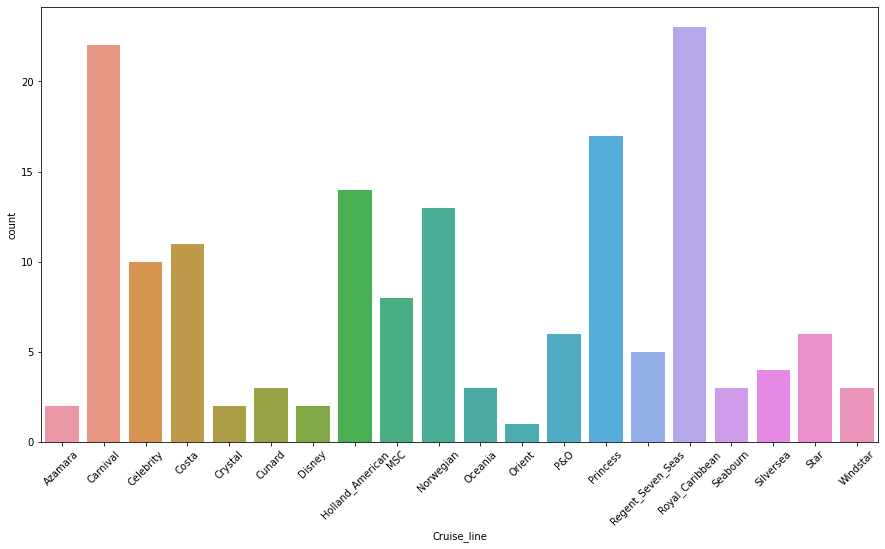

In [79]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Cruise_line", data=data)
plt.xticks(rotation = 45)
plt.show()

#**Pair plot on dataset**

<Figure size 1080x576 with 0 Axes>

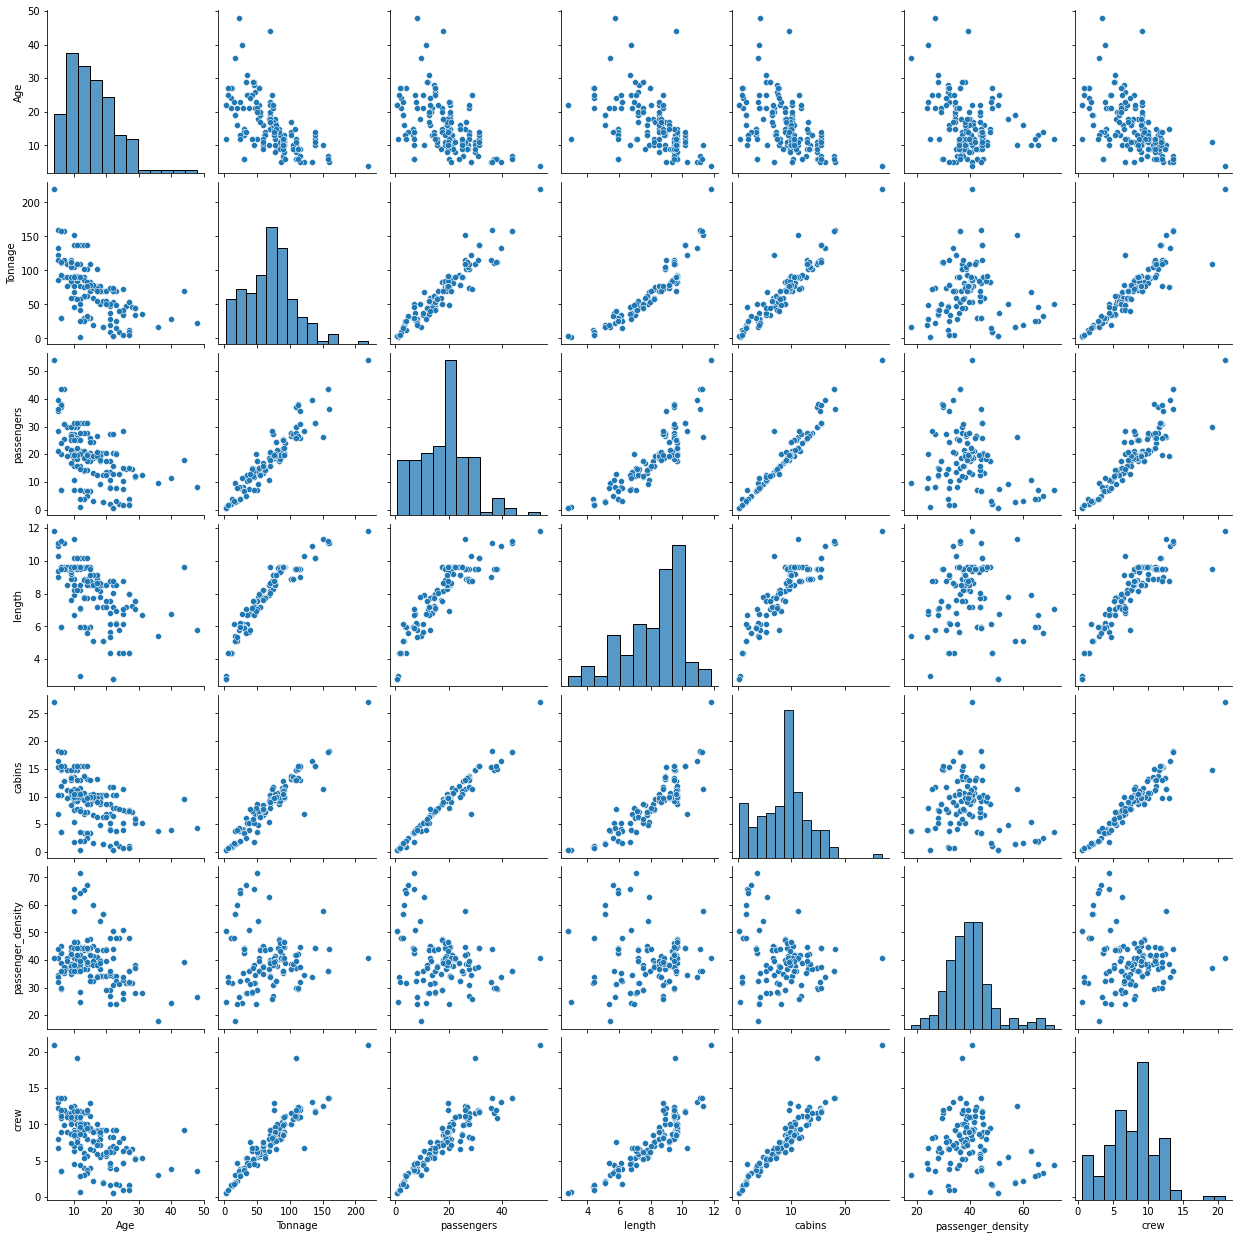

In [45]:
# Pair plot
plt.figure(figsize=(15,8))
sns.pairplot(data)

# **Display records having crew greater then 9.99**

In [43]:
data.loc[(data['crew'] > 9.99 ) ]

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50
10,Glory,Carnival,10,110.000,29.74,9.51,14.87,36.99,11.60
15,Liberty*,Carnival,8,110.000,29.74,9.51,14.87,36.99,11.60
16,Miracle,Carnival,9,88.500,21.24,9.63,10.62,41.67,10.30
20,Spirit,Carnival,12,88.500,21.24,9.63,10.56,41.67,10.29
21,Triumph,Carnival,14,101.509,27.58,8.93,13.21,36.81,10.00
22,Valor,Carnival,9,110.000,29.74,9.52,14.87,36.99,11.60
23,Victory,Carnival,13,101.509,27.58,8.93,13.79,36.81,11.50


# **One Hot Encoding** 

In [9]:
def onehot_encode(df, column):
  df = df.copy()
  df = pd.concat([df, pd.get_dummies(df[column], prefix=column)], axis=1)
  df = df.drop(column, axis=1)
  return df

In [10]:
onehot_encode_data = onehot_encode(data, 'Cruise_line')
onehot_encode_data

,Ship_name,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Azamara,Cruise_line_Carnival,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,Journey,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Quest,6,30.277,6.94,5.94,3.55,42.64,3.55,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Celebration,26,47.262,14.86,7.22,7.43,31.80,6.70,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Conquest,11,110.000,29.74,9.53,14.88,36.99,19.10,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Destiny,17,101.353,26.42,8.92,13.21,38.36,10.00,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Taurus,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,...,0,0,0,0,0,0,0,0,1,0
154,Virgo,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,...,0,0,0,0,0,0,0,0,1,0
155,Spirit,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1
156,Star,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,...,0,0,0,0,0,0,0,0,0,1


# **Checking correlation between Onehot Ecoded data with column crew**

In [85]:
onehot_encode_data.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.530657,-0.144524,-0.024509,-0.068134,...,-0.024860,0.339671,-0.044226,-0.125722,0.002622,-0.110792,0.152290,0.001276,0.090992,0.170616
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.927569,-0.125115,0.144878,0.034138,...,-0.153727,-0.105815,0.035195,0.152072,-0.190679,0.397353,-0.229741,-0.218806,-0.216892,-0.235432
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.915234,-0.135189,0.208503,-0.012864,...,-0.167547,-0.084367,0.048661,0.113797,-0.248296,0.444669,-0.236197,-0.251483,-0.185896,-0.235764
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.895857,-0.138741,0.172778,0.041782,...,-0.170470,-0.104935,0.056607,0.117096,-0.238093,0.351992,-0.290309,-0.232187,-0.298459,-0.244397
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.950823,-0.134128,0.246260,-0.044672,...,-0.168860,-0.082007,0.042792,0.139078,-0.274656,0.397755,-0.243145,-0.257444,-0.174510,-0.243978
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.155509,0.036013,-0.180043,-0.011076,...,0.070419,-0.122059,-0.039819,0.053184,0.406040,-0.154732,0.132130,0.392047,-0.060044,-0.031948
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,1.000000,-0.137602,0.269685,0.020678,...,-0.151144,-0.098131,0.045179,0.151938,-0.240603,0.262656,-0.246750,-0.245582,-0.138289,-0.263215
Cruise_line_Azamara,-0.144524,-0.125115,-0.135189,-0.138741,-0.134128,0.036013,-0.137602,1.000000,-0.045540,-0.029432,...,-0.015752,-0.009037,-0.022496,-0.039316,-0.020469,-0.046736,-0.015752,-0.018248,-0.022496,-0.015752
Cruise_line_Carnival,-0.024509,0.144878,0.208503,0.172778,0.246260,-0.180043,0.269685,-0.045540,1.000000,-0.104547,...,-0.055955,-0.032099,-0.079909,-0.139655,-0.072708,-0.166012,-0.055955,-0.064820,-0.079909,-0.055955
Cruise_line_Celebrity,-0.068134,0.034138,-0.012864,0.041782,-0.044672,-0.011076,0.020678,-0.029432,-0.104547,1.000000,...,-0.036163,-0.020745,-0.051644,-0.090258,-0.046990,-0.107292,-0.036163,-0.041893,-0.051644,-0.036163


#**Checking correlation without Onehot encoding**

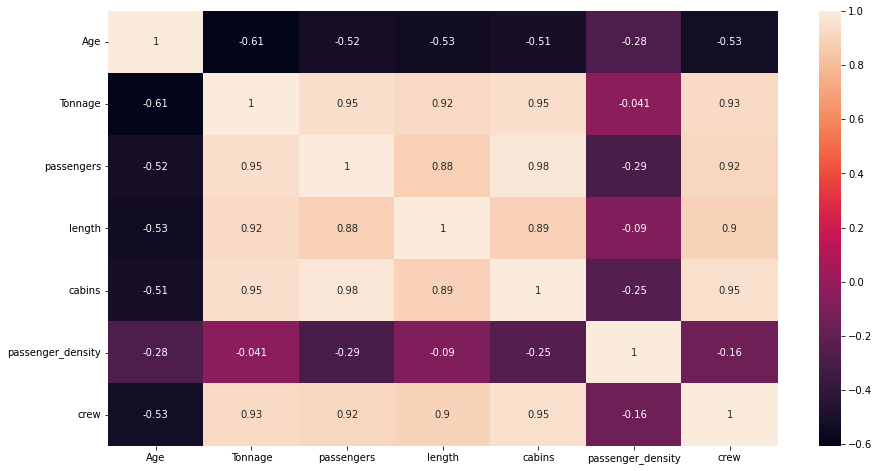

In [12]:
#Correlation Graph
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

#**Feature selection based on correlation matrix**

According to the correlation matrix
**Age** is moderately correlated to **crew** having value between 0.5 and 0.7.

**Tonnage**, **passengers**, **length** and **cabins** are strongly correlated to the **crew** having value greater then 0.7.

All the columns which were **hot one encoded** has correlation value against crew is less then 0.3 so we ingonred all those columns.

In [47]:
selected_columns = ['Age','Tonnage', 'passengers', 'length', 'cabins','crew'];
final_data = data[selected_columns];
final_data.head()

,Age,Tonnage,passengers,length,cabins,crew
0,6,30.277,6.94,5.94,3.55,3.55
1,6,30.277,6.94,5.94,3.55,3.55
2,26,47.262,14.86,7.22,7.43,6.70
3,11,110.000,29.74,9.53,14.88,19.10
4,17,101.353,26.42,8.92,13.21,10.00


**Feature and target variables**

In [48]:
X = final_data[selected_columns].iloc[:,0:5].values    # features matrix  
y = final_data[selected_columns]['crew'].values        # target variable

# **Model Building and evaluation**

## Split the Dataset into train (60%) and test (40%)

In [49]:
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.6, random_state=0)

##Linear Regression

In [50]:
# Define the model
crew_model_lr = LinearRegression();

# Fit the model
crew_model_lr.fit(X, y)

print(crew_model_lr.score(X, y))


0.9244596446243353


In [51]:
#Prediction
crew_predictions_lr = crew_model_lr.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(crew_predictions_lr, y_test)

print("Mean Absolute Error: %.2f" % mae)
print("Accuracy: %.2f%%" % (100 * (1 - (mae / y.mean()))))

Mean Absolute Error: 0.64
Accuracy: 91.80%


In [92]:
# The coefficients
print("Coefficients: \n", crew_model_lr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, crew_predictions_lr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, crew_predictions_lr))

Coefficients: 
 [-0.01235446  0.01291527 -0.14862736  0.403835    0.80216527]
Mean squared error: 0.87
Coefficient of determination: 0.93


##KNeighborsRegressor

In [62]:
# Define the model
crew_model_knr = KNeighborsRegressor(n_neighbors=2)

# Fit the model
crew_model_knr.fit(X, y)


KNeighborsRegressor(n_neighbors=2)

In [58]:
#Prediction
crew_predictions_knr = crew_model_knr.predict(X_test)
# Calculate MAE
mae = mean_absolute_error(crew_predictions_knr, y_test)

print("Mean Absolute Error: %.2f" % mae)
print("Accuracy: %.2f%%" % (100 * (1 - (mae / y.mean()))))

Mean Absolute Error: 0.37
Accuracy: 95.22%


##SVR

In [61]:
# Define the model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
# Fit the model
svr_rbf.fit(X, y)


SVR(C=100, gamma=0.1)

In [63]:
#Prediction
crew_predictions_svr_rbf = svr_rbf.predict(X_test)
# Calculate MAE
mae = mean_absolute_error(crew_predictions_svr_rbf, y_test)

print("Mean Absolute Error: %.2f" % mae)
print("Accuracy: %.2f%%" % (100 * (1 - (mae / y.mean()))))

Mean Absolute Error: 0.15
Accuracy: 98.11%


In [64]:
# Define the model
svr_lin = SVR(kernel="linear", C=100, gamma="auto")

# Fit the model
svr_lin.fit(X, y)

SVR(C=100, gamma='auto', kernel='linear')

In [86]:
#Prediction
crew_predictions_svr_lin = svr_lin.predict(X_test)
# Calculate MAE
mae = mean_absolute_error(crew_predictions_svr_lin, y_test)

print("Mean Absolute Error: %.2f" % mae)
print("Accuracy: %.2f%%" % (100 * (1 - (mae / y.mean()))))

Mean Absolute Error: 0.65
Accuracy: 91.68%
